In [1]:
# Test 20newsgroups
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'comp.os.ms-windows.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
documents = data.data
labels = data.target

# documents[:3]

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"                  # mainkan nilai ini
import torch
print("CUDA available:", torch.cuda.is_available())
print("Jumlah GPU terlihat:", torch.cuda.device_count())
print("Nama GPU:", torch.cuda.get_device_name())

CUDA available: True
Jumlah GPU terlihat: 1
Nama GPU: Quadro RTX 5000


In [3]:
# CARA PAKAI

from pipeline2 import DocumentClusteringPipeline

topic_model = DocumentClusteringPipeline(
    embedding_device="cuda"  # jika pakai gpu ; pastikan cell [2] : true ; ada
)

topic_model.fit(
    documents=documents,
    # umap_params=None,      # otomatis default
    # hdbscan_params=None,   # otomatis default
    verbose=True
)

DOCUMENT CLUSTERING PIPELINE
Documents: 1975
⚠ UMAP params not provided → using default
⚠ HDBSCAN params not provided → using default

[1/3] Generating SBERT embeddings...


Batches: 100%|██████████| 62/62 [00:03<00:00, 15.93it/s]


✔ Embeddings shape: (1975, 384)

[2/3] GridSearch UMAP + HDBSCAN

→ UMAP params: {'n_neighbors': 15, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'}
  HDBSCAN params: {'min_cluster_size': 10, 'metric': 'euclidean', 'cluster_selection_method': 'eom'} [1/1]
    ✔ clusters=28, noise=0.17, silhouette=0.4217

BEST RESULT
UMAP params     : {'n_neighbors': 15, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'}
HDBSCAN params  : {'min_cluster_size': 10, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Clusters        : 28
Noise ratio     : 0.17
Silhouette      : 0.4217
DBCV            : 0.4849

[3/3] Remapping by cluster size...
Topic mapping (old → new): {-1: -1, np.int64(2): 0, np.int64(14): 1, np.int64(0): 2, np.int64(24): 3, np.int64(26): 4, np.int64(25): 5, np.int64(10): 6, np.int64(5): 7, np.int64(21): 8, np.int64(15): 9, np.int64(6): 10, np.int64(9): 11, np.int64(12): 12, np.int64(3): 13, np.int64(19): 14, np.int64(22): 15, np.int64(27): 16, np.int64(13): 17, np.in

In [4]:
# pipeline.umap_params
# pipeline.hdbscan_params
# pipeline.n_clusters
# pipeline.silhouette
# pipeline.dbcv

In [ ]:
def pretty_print_topics(topic_mapping, topic_sizes):
    print("\n📌 Topic Mapping (old → new)")
    print("─" * 35)

    for old, new in sorted(topic_mapping.items(), key=lambda x: x[1]):
        print(f"  {old:>4}  →  {new:>2}")

    print("\n📊 Topic Sizes")
    print("─" * 35)

    for topic, size in sorted(topic_sizes.items()):
        print(f"  Topic {topic:>2}: {int(size):>4} documents")

pretty_print_topics(topic_model.topic_mapping, topic_model.topic_sizes)

In [7]:
np.unique(topic_model.labels, return_counts=True)
# pd.Series(topic_model.labels).value_counts().sort_index()

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([332, 901, 123,  57,  45,  44,  42,  38,  32,  31,  28,  22,  22,
         21,  20,  20,  20,  19,  17,  17,  16,  14,  14,  14,  14,  14,
         13,  13,  12]))

In [17]:
np.unique(topic_model.labels_original, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([332,  57,  14, 901,  20,  16,  32,  22,  12,  14,  22,  38,  13,
         21,  17, 123,  28,  14,  17,  14,  20,  14,  31,  20,  13,  45,
         42,  44,  19]))

In [8]:
topic_model.gridsearch_log.sort_values(
    by="silhouette",
    ascending=False
).head(10)

,umap_params,hdbscan_params,n_clusters,noise_ratio,silhouette
0,"{'n_neighbors': 15, 'n_components': 5, 'min_di...","{'min_cluster_size': 10, 'metric': 'euclidean'...",28,0.168101,0.421678


In [9]:
print(
    topic_model.inspect_clusters(
        n_samples=2,
        n_clusters=3,
        include_noise=True
    )
)

=== Cluster -1 ===
1. I was kind of half watching Street Stories last night 	and one of the segments was about this doctor in 	S.F. who provides a service of investigating treatment 	for various diseases. I'm pretty sure his name is 	Dr. Mark Renniger (sp?) or close to that.  	Did anyone else watch this? I'd like to get his 	correct name and address/phone number if possible. 	Thanks.
2. Who knows in this legal climate, but there is tremendous legal precendent for forcibly quarantining TB patients in sanitariums.  100 yrs ago it was done all the time.  It has been done sporadically all along in patients who won't take their medicine.  If you have TB you may find yourself under surveilence of the Public Health Department and you may find they have the legal power to insist you make your clinic visits. --  ---------------------------------------------------------------------------- Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and geb@cadre.dsl.pitt.edu   |  it 

In [10]:
topic_model.to_dataframe()

,document,cluster,embedding,embedding_umap
0,\nOne possible reason is that file' is made wi...,-1,"[-0.019891859963536263, -0.035705357789993286,...","[3.400676965713501, 0.38540273904800415, 2.034..."
1,"\n\nWell, this is *only* a guess: If it goes ...",0,"[0.01768517680466175, 0.024664096534252167, -0...","[-0.5503146648406982, 7.910894393920898, -1.35..."
2,Sumatriptan(Imitrex) just became available in ...,1,"[0.01569168083369732, 0.009702440351247787, 0....","[2.197859525680542, 0.5222933292388916, 2.6189..."
3,\n: The key issue that I bought my BJ-200 on w...,0,"[-0.08988973498344421, -0.006656181067228317, ...","[-0.781647801399231, 7.802807807922363, -0.286..."
4,"I have written the file manager HFM, wich has ...",0,"[-0.05293041095137596, 0.025076163932681084, -...","[-0.4843400716781616, 8.17042064666748, -0.937..."
...,...,...,...,...
1970,"\nMexico City, Bogota, La Paz?\n",-1,"[0.12491270899772644, 0.019573794677853584, -0...","[1.1885656118392944, 2.5097758769989014, 2.417..."
1971,\n\n\n\nThis pretty much confirms my original ...,0,"[-0.07176358252763748, -0.010558408685028553, ...","[-0.7295436859130859, 8.773776054382324, -0.63..."
1972,\n\n------------ Part 10 of 14 ------------\nM...,13,"[-0.05928993970155716, 0.019631274044513702, 0...","[0.21216967701911926, 4.804776668548584, 2.183..."
1973,ctwomey@vms.eurokom.ie (Colum Twomey) comments...,5,"[-0.008623323403298855, -0.059014108031988144,...","[0.9446478486061096, 3.522465467453003, 1.8308..."


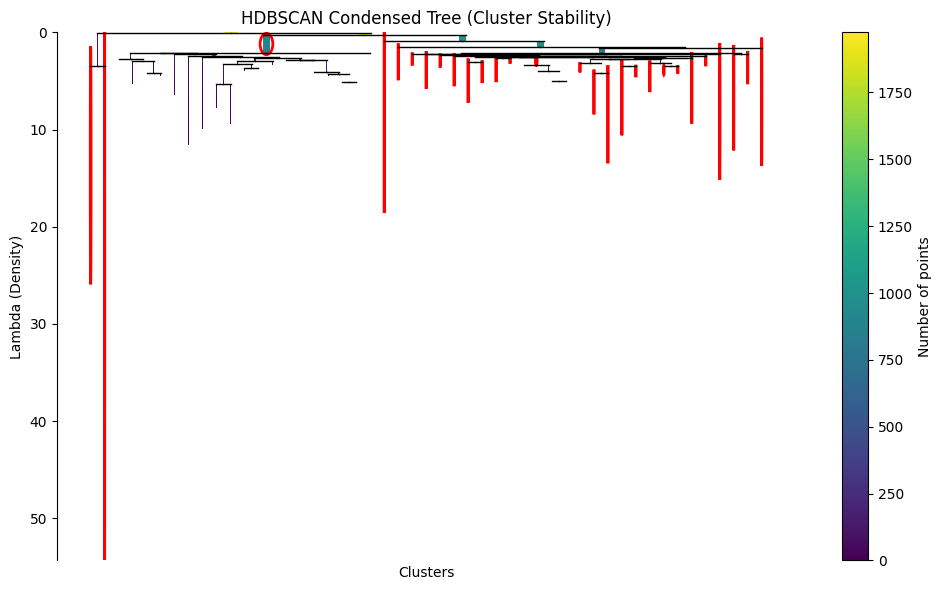

In [11]:
topic_model.visualize_hdbscan_tree()

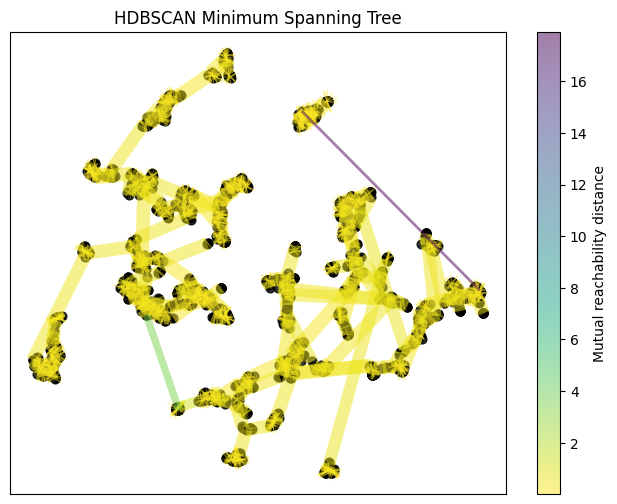

In [12]:
topic_model.visualize_hdbscan_mst()

In [13]:
dir(topic_model)

['DEFAULT_HDBSCAN_PARAMS',
 'DEFAULT_UMAP_PARAMS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ensure_list',
 '_hdbscan_clusterer',
 '_sort_topic_ids_by_size',
 '_validate_or_default_params',
 'dbcv',
 'documents',
 'embedding_device',
 'embeddings',
 'fit',
 'gridsearch_log',
 'hdbscan_params',
 'inspect_clusters',
 'labels',
 'labels_original',
 'model_name',
 'n_clusters',
 'noise_ratio',
 'probabilities',
 'random_state',
 'reduced_embeddings',
 'silhouette',
 'to_dataframe',
 'topic_mapping',
 'topic_sizes',
 'umap_params',
 'visualize_hdbscan_mst',
 'visualize_hdbscan_tree']

In [14]:
# pipeline = DocumentClusteringPipeline(random_state=None)

In [15]:
# pipeline.fit(
#     documents=documents,
#     # umap_params=None,      # otomatis default
#     # hdbscan_params=None,   # otomatis default
#     verbose=True
# )

In [16]:
# dir(pipeline)